Object Detection
https://huggingface.co/fcakyon/yolov5n-v7.0

In [ ]:
!pip install -U yolov5


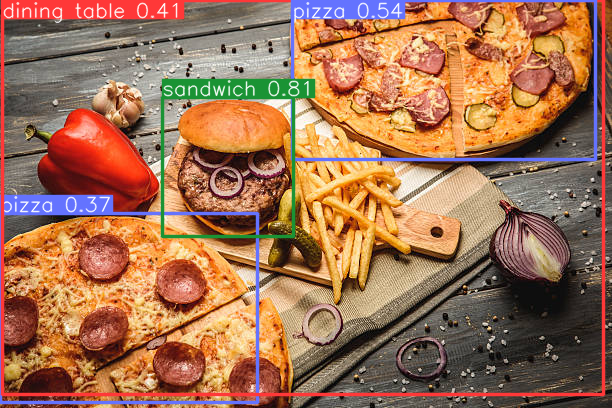

Saved 1 image to results4


In [4]:
import yolov5

# load model
model = yolov5.load('fcakyon/yolov5s-v7.0')
  
# set model parameters
model.conf = 0.25  # NMS confidence threshold
model.iou = 0.45  # NMS IoU threshold
model.agnostic = False  # NMS class-agnostic
model.multi_label = False  # NMS multiple labels per box
model.max_det = 1000  # maximum number of detections per image

set image
img = 'https://media.istockphoto.com/id/618546412/photo/pizza-and-hamburger-on-wooden-background.jpg?s=612x612&w=0&k=20&c=vunadZByjJhV_S7DqjlmpM9hQMk_Y7dVrNt9pYCu_Ww='

# perform inference
results = model(img)

# inference with larger input size
results = model(img, size=640)

# inference with test time augmentation
results = model(img, augment=True)

# parse results
predictions = results.pred[0]
boxes = predictions[:, :4] # x1, y1, x2, y2
scores = predictions[:, 4]
categories = predictions[:, 5]

# show detection bounding boxes on image
results.show()

# save results into "results/" folder
results.save(save_dir='results/')


###Speech to Text

# Live Colab Example


## Dependencies and Imports

In [10]:
#@title Install dependencies

!pip install -q omegaconf torchaudio pydub

import os
from os.path import exists

if not exists('silero-models'):
  !git clone -q --depth 1 https://github.com/snakers4/silero-models

%cd silero-models

# silero imports
import torch
import random
from glob import glob
from omegaconf import OmegaConf
from src.silero.utils import (init_jit_model, 
                       split_into_batches,
                       read_audio,
                       read_batch,
                       prepare_model_input)
from colab_utils import (record_audio,
                         audio_bytes_to_np,
                         upload_audio)

device = torch.device('cpu')   # you can use any pytorch device
models = OmegaConf.load('models.yml')

# imports for uploading/recording
import numpy as np
import ipywidgets as widgets
from scipy.io import wavfile
from IPython.display import Audio, display, clear_output
from torchaudio.functional import vad


# wav to text method
def wav_to_text(f='test.wav'):
  batch = read_batch([f])
  input = prepare_model_input(batch, device=device)
  output = model(input)
  return decoder(output[0].cpu())

/content/silero-models/silero-models


## Transcribe

In [11]:
#@markdown { run: "auto" }

language = "English" #@param ["English", "German", "Spanish"]

print(language)
if language == 'German':
  model, decoder = init_jit_model(models.stt_models.de.latest.jit, device=device)
elif language == "Spanish":
  model, decoder = init_jit_model(models.stt_models.es.latest.jit, device=device)
else:
  model, decoder = init_jit_model(models.stt_models.en.latest.jit, device=device)

English


100%|██████████| 112M/112M [00:04<00:00, 23.5MB/s]


In [12]:
#@markdown { run: "auto" }

use_VAD = "No" #@param ["Yes", "No"]

In [14]:
#@markdown Either record audio from microphone or upload audio from file (.mp3 or .wav) { run: "auto" }

record_or_upload = "Record" #@param ["Record", "Upload (.mp3 or .wav)"]
record_seconds =   4#@param {type:"number", min:1, max:10, step:1}
sample_rate = 16000

def _apply_vad(audio, boot_time=0, trigger_level=9, **kwargs):
  print('\nVAD applied\n')
  vad_kwargs = dict(locals().copy(), **kwargs)
  vad_kwargs['sample_rate'] = sample_rate
  del vad_kwargs['kwargs'], vad_kwargs['audio']
  audio = vad(torch.flip(audio, ([0])), **vad_kwargs)
  return vad(torch.flip(audio, ([0])), **vad_kwargs)

def _recognize(audio):
  display(Audio(audio, rate=sample_rate, autoplay=True))
  if use_VAD == "Yes":
    audio = _apply_vad(audio)
  wavfile.write('test.wav', sample_rate, (32767*audio).numpy().astype(np.int16))
  transcription = wav_to_text()
  print('\n\nTRANSCRIPTION:\n')
  print(transcription)

def _record_audio(b):
  clear_output()
  audio = record_audio(record_seconds)
  wavfile.write('recorded.wav', sample_rate, (32767*audio).numpy().astype(np.int16))
  _recognize(audio)

def _upload_audio(b):
  clear_output()
  audio = upload_audio()
  _recognize(audio)
  return audio

if record_or_upload == "Record":
  button = widgets.Button(description="Record Speech")
  button.on_click(_record_audio)
  display(button)
else:
  audio = _upload_audio("")

Starting recording for 4 seconds...


<IPython.core.display.Javascript object>

Finished recording!




TRANSCRIPTION:

glasses and happple


In [15]:
#@markdown Check audio after applying VAD { run: "auto" }

if record_or_upload == "Record":
  audio = read_audio('recorded.wav', sample_rate)
display(Audio(_apply_vad(audio), rate=sample_rate, autoplay=True))


VAD applied

